## This notebook contains the several part:
* familiar with the data
* visualize the data
* processing the data (null values, categorical values), normalize the data
* model choose

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import tree

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-vw6wseh2 because the default path (/home/mt/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
raw_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = raw_df.copy()
df.drop(columns=['id'],inplace=True)
print(df.describe())
print('------------------------------------------------------------------')
print(df.info())


               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  
---------------------------------------------------------------

### Observation:
* There is null values in 'bmi'.

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
num_of_nan = 0
for i in(df['bmi']):
    if np.isnan(i):
        num_of_nan += 1
print(f"Number of nan in 'bmi' column is {num_of_nan}")

Number of nan in 'bmi' column is 201


I want to see if I can drop these rows if their "stroke" label is 0 (because there are many non_stroke data)

In [5]:
num_of_nan = 0
num_of_stroke = 0
for i in range(len(df)):
    if np.isnan(df['bmi'][i]) and df['stroke'][i]==1:
        num_of_nan += 1
    if df['stroke'][i] == 1:
        num_of_stroke += 1
print(f"Number of cases where 1.stroke and 2.nan found in 'bmi' is {num_of_nan}")
print(f"Total number of stroke cases is {num_of_stroke}")

Number of cases where 1.stroke and 2.nan found in 'bmi' is 40
Total number of stroke cases is 249


* The above numbers show that we can not drop the rows with nan in 'bmi' columnn, because 40 out of 249 stroke cases have nan in bmi.
* Instead, we will use pandas fillna to fill the nans.

In [6]:
# fill the nan in bmi with mean value of the rest in bmi columnn
df=df.fillna(np.mean(df['bmi']))

### Our data contains numerical and categorical values, we will analysis them seperately.

In [7]:
df_num = df[['age', 'avg_glucose_level', 'bmi']]
df_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
             'work_type', 'Residence_type', 'smoking_status', 'stroke']]

## Analysis of numerical data
### Univariate analysis of Numerical Variables

<AxesSubplot:ylabel='Density'>

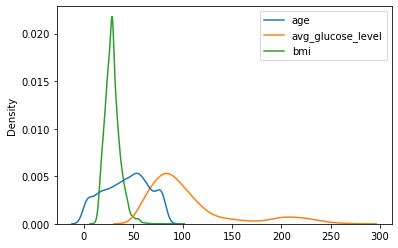

In [8]:
sns.kdeplot(data=df_num)

In [9]:
df_age = df[['age', 'stroke']]
df_avg_glucose_level = df[['avg_glucose_level', 'stroke']]
df_bmi = df[['bmi', 'stroke']]

df_age_stroke = df_age.loc[df_age['stroke'] == 1]
df_age_non_stroke = df_age.loc[df_age['stroke'] == 0]
df_avg_glucose_level_stroke = df_avg_glucose_level.loc[df_avg_glucose_level['stroke'] == 1]
df_avg_glucose_level_non_stroke = df_avg_glucose_level.loc[df_avg_glucose_level['stroke'] == 0]
df_bmi_stroke = df_bmi.loc[df_bmi['stroke'] == 1]
df_bmi_non_stroke = df_bmi.loc[df_bmi['stroke'] == 0]

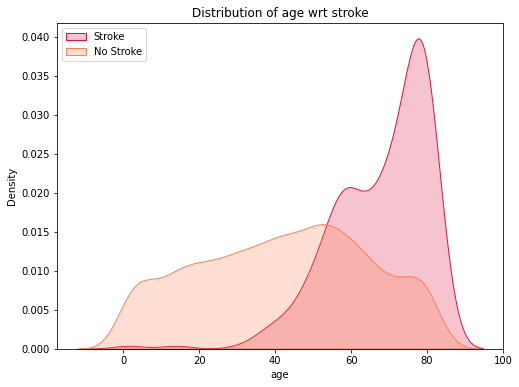

In [10]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1,1)
# adding figures
ax = fig.add_subplot(gs[0,0])
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
plt.title('Distribution of age wrt stroke')
sns.kdeplot(ax=ax,x=df_age_stroke['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax,x=df_age_non_stroke['age'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper left')
plt.show()


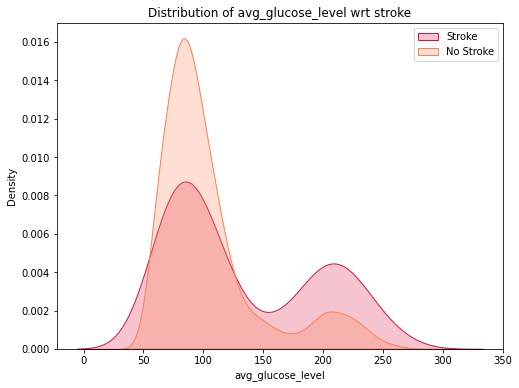

In [11]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
plt.title('Distribution of avg_glucose_level wrt stroke')
sns.kdeplot(ax=ax,x=df_avg_glucose_level_stroke['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax,x=df_avg_glucose_level_non_stroke['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper right')
plt.show()

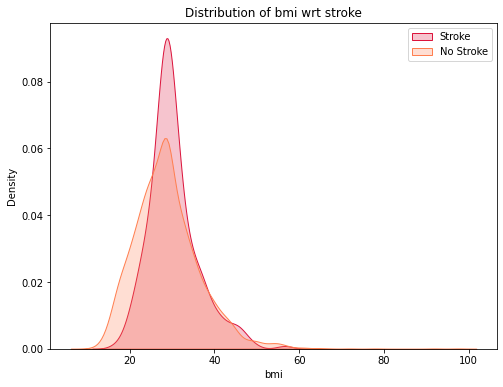

In [12]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
plt.title('Distribution of bmi wrt stroke')
sns.kdeplot(ax=ax,x=df_bmi_stroke['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax,x=df_bmi_non_stroke['bmi'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper right')
plt.show()

### Bivariate analysis of Numerical Variables

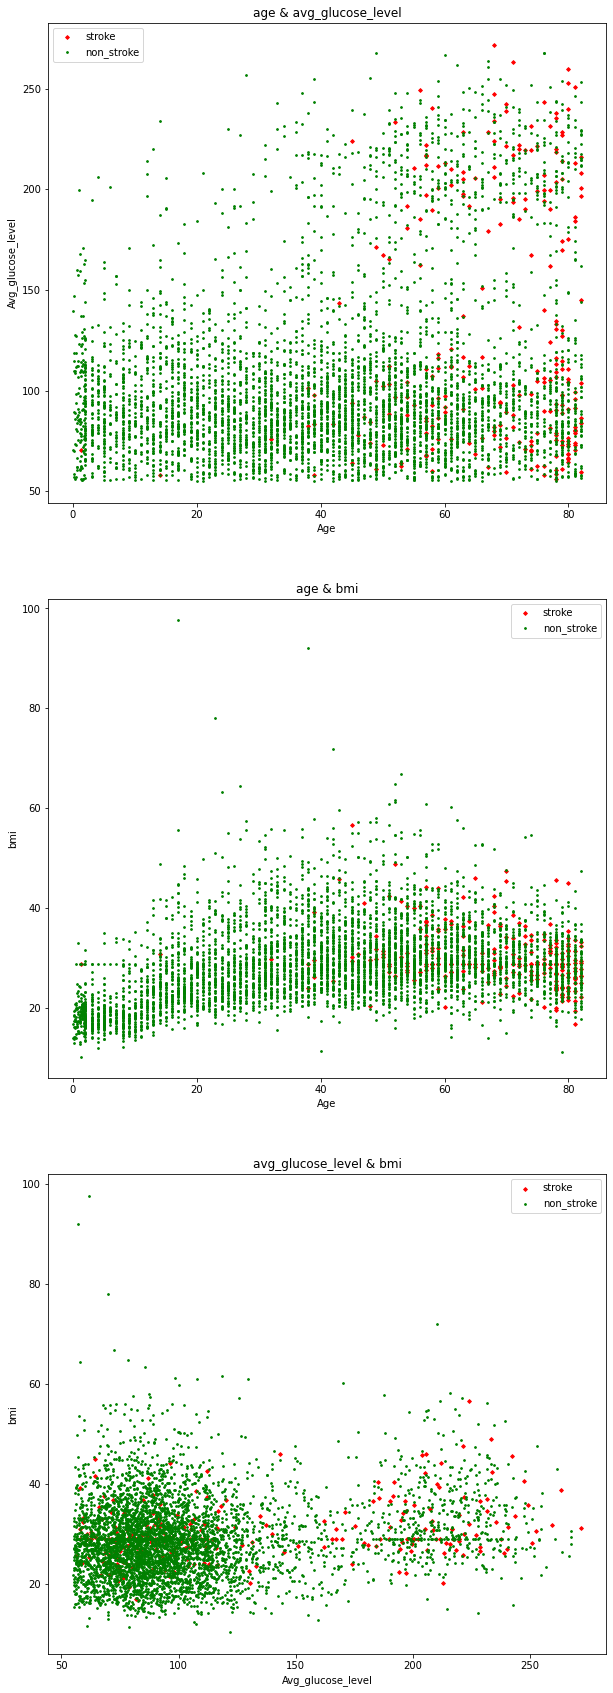

In [13]:
df_age_avg_glucose_level = df[['age', 'avg_glucose_level', 'stroke']]
df_age_bmi = df[['age', 'bmi', 'stroke']]
df_bmi_age_avg_glucose_level = df[['bmi', 'avg_glucose_level','stroke']]

df_age_avg_glucose_level_stroke = df_age_avg_glucose_level.loc[df_age_avg_glucose_level['stroke'] == 1]
df_age_avg_glucose_level_non_stroke = df_age_avg_glucose_level.loc[df_age_avg_glucose_level['stroke'] == 0]
df_age_bmi_stroke = df_age_bmi.loc[df_age_bmi['stroke'] == 1]
df_age_bmi_non_stroke = df_age_bmi.loc[df_age_bmi['stroke'] == 0]
df_bmi_age_avg_glucose_level_stroke = df_bmi_age_avg_glucose_level.loc[df_bmi_age_avg_glucose_level['stroke'] == 1]
df_bmi_age_avg_glucose_level_non_stroke = df_bmi_age_avg_glucose_level.loc[df_bmi_age_avg_glucose_level['stroke'] == 0]


plt.figure(figsize=(10,30))
plt.subplot(3,1,1)
plt.title('age & avg_glucose_level')
plt.scatter(df_age_avg_glucose_level_stroke['age'], df_age_avg_glucose_level_stroke['avg_glucose_level'], marker='D', s=7, c='red', label='stroke')
plt.scatter(df_age_avg_glucose_level_non_stroke['age'], df_age_avg_glucose_level_non_stroke['avg_glucose_level'], s=3, c='green', label='non_stroke')
plt.xlabel('Age')
plt.ylabel('Avg_glucose_level')
plt.legend()

plt.subplot(3,1,2)
plt.title('age & bmi')
plt.scatter(df_age_bmi_stroke['age'], df_age_bmi_stroke['bmi'], marker='D', s=7, c='red', label='stroke')
plt.scatter(df_age_bmi_non_stroke['age'], df_age_bmi_non_stroke['bmi'], s=3, c='green', label='non_stroke')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.legend()

plt.subplot(3,1,3)
plt.title('avg_glucose_level & bmi')
plt.scatter(df_bmi_age_avg_glucose_level_stroke['avg_glucose_level'], df_bmi_age_avg_glucose_level_stroke['bmi'], marker='D', s=7, c='red', label='stroke')
plt.scatter(df_bmi_age_avg_glucose_level_non_stroke['avg_glucose_level'], df_bmi_age_avg_glucose_level_non_stroke['bmi'], s=3, c='green', label='non_stroke')
plt.xlabel('Avg_glucose_level')
plt.ylabel('bmi')
plt.legend()

plt.show()


* Correlation between numerical variables

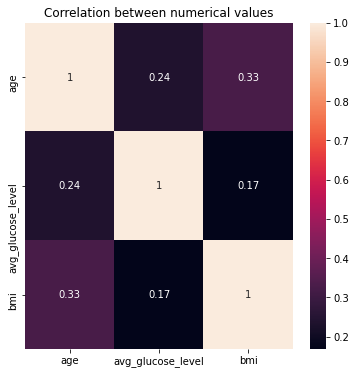

In [14]:
corr_mat = df_num.corr()
plt.rcParams["figure.figsize"] = (6, 6)
plt.title('Correlation between numerical values')
sns.heatmap(corr_mat, annot=True)
plt.show()

<Figure size 2000x1500 with 0 Axes>

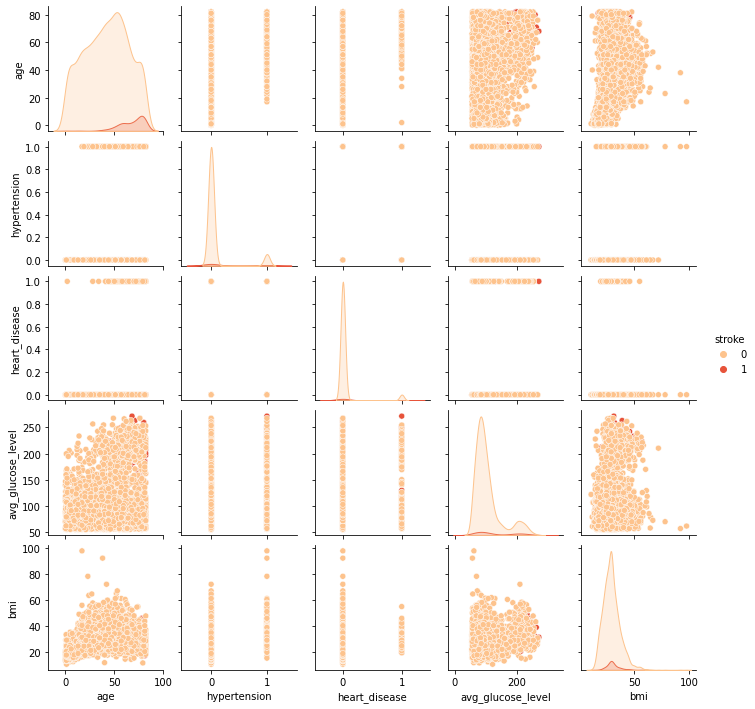

In [15]:
fig=plt.figure(figsize=(20,15), dpi=100)
sns.pairplot(data=df, hue='stroke', height=2, palette='OrRd')
plt.show()

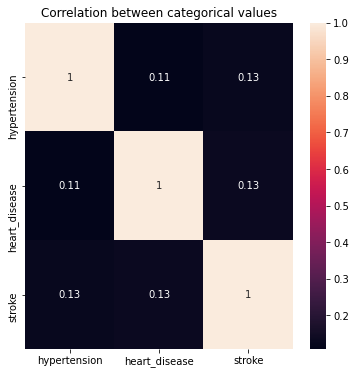

In [16]:
corr_mat = df_cat.corr()
plt.rcParams["figure.figsize"] = (6, 6)
plt.title('Correlation between categorical values')
sns.heatmap(corr_mat, annot=True)
plt.show()

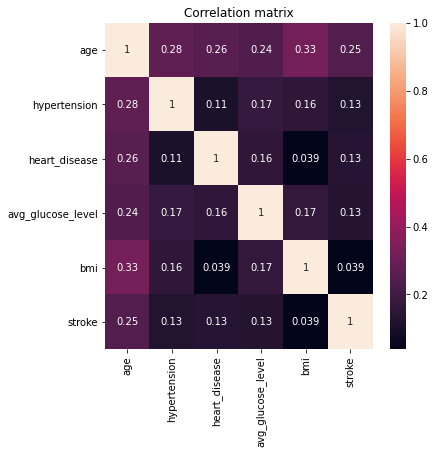

In [17]:
corr_mat = df.corr()
plt.rcParams["figure.figsize"] = (6, 6)
plt.title('Correlation matrix')
sns.heatmap(corr_mat, annot=True)
plt.show()

* no obvious coorelation among these features.
* "bmi" and "age" has some coorelation with each other.

## Data processing

In [18]:
df_header_list = list(df.columns)
print(df_header_list)
df_header_list.remove('age')
df_header_list.remove('avg_glucose_level')
df_header_list.remove('bmi')
print(df_header_list)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


In [19]:
for header in df_header_list:
    print(header)
    df1 = df[header]    
    df2 = df1.value_counts()
    df3 = df1.value_counts(normalize=True)
    print(pd.DataFrame({"count":df2,"%":df3*100}))
    print()

gender
        count          %
Female   2994  58.590998
Male     2115  41.389432
Other       1   0.019569

hypertension
   count          %
0   4612  90.254403
1    498   9.745597

heart_disease
   count          %
0   4834  94.598826
1    276   5.401174

ever_married
     count          %
Yes   3353  65.616438
No    1757  34.383562

work_type
               count          %
Private         2925  57.240705
Self-employed    819  16.027397
children         687  13.444227
Govt_job         657  12.857143
Never_worked      22   0.430528

Residence_type
       count          %
Urban   2596  50.802348
Rural   2514  49.197652

smoking_status
                 count          %
never smoked      1892  37.025440
Unknown           1544  30.215264
formerly smoked    885  17.318982
smokes             789  15.440313

stroke
   count          %
0   4861  95.127202
1    249   4.872798



In [20]:
# gender: Male:1, Female:0
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 

# ever_married: Yes:1, No:0
df['ever_married']=df['ever_married'].apply(lambda x : 1 if x=='Yes' else 0) 

# work_type: Private: 0, Self-employed:1 children:2, Govt_job:3, Never_worked:4
'''df['work_type']=df['work_type'].apply(lambda x : 0 if x=='Private' else x) 
df['work_type']=df['work_type'].apply(lambda x : 1 if x=='Self-employed' else x) 
df['work_type']=df['work_type'].apply(lambda x : 2 if x=='children' else x) 
df['work_type']=df['work_type'].apply(lambda x : 3 if x=='Govt_job' else 4) 
'''
# Residence_type: Urban:1, Rural:0
df['Residence_type']=df['Residence_type'].apply(lambda x : 1 if x=='Urban' else 0) 

# smoking_status: never smoked:0, Unknown:1, formerly smoked: 2, smokes:3
'''df['smoking_status']=df['smoking_status'].apply(lambda x : 0 if x=='never smoked' else x) 
df['smoking_status']=df['smoking_status'].apply(lambda x : 1 if x=='Unknown' else x) 
df['smoking_status']=df['smoking_status'].apply(lambda x : 2 if x=='formerly smoked' else 3) '''

df_one_hot = pd.get_dummies(df, columns=['work_type', 'smoking_status'])

In [21]:
df_one_hot.head(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0


In [22]:
df = df_one_hot
X_keys = []
for i in df.keys():
    if i != 'stroke':
        X_keys.append(i)
print(X_keys)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [23]:
# spilit the data
from sklearn.model_selection import train_test_split
# X: (n_sample, n_feature)
X = df[X_keys].to_numpy()
y = df['stroke'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



(3832, 17) (1278, 17)
(3832,) (1278,)


### Standardizing our training and testing data.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Different methods:
* KNN
* Desicion Tree
* Logistic Regression
* SVM
* NN

recall:  0.0
precision  0.0
f1_score 0.0


/home/mt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


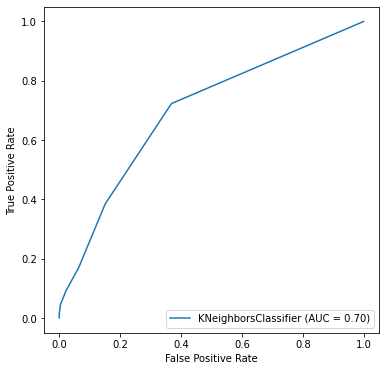

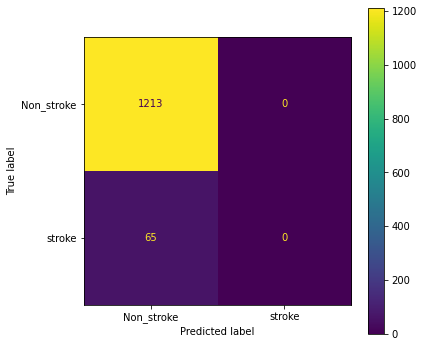

In [25]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test) 
y_pred = clf.predict(X_test)
print('recall: ', metrics.recall_score(y_test, y_pred))
print('precision ', metrics.precision_score(y_test, y_pred))
print('f1_score', metrics.f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
v_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non_stroke', 'stroke'])
v_cm.plot(values_format='d')

### DecisionTreeClassifier

recall:  0.12307692307692308
precision  0.13793103448275862
f1_score 0.13008130081300814


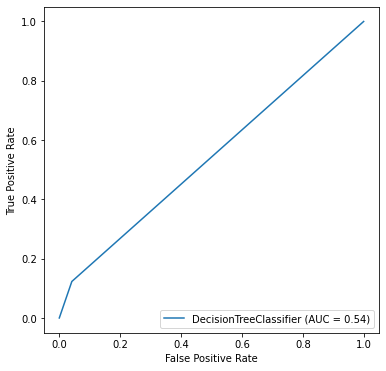

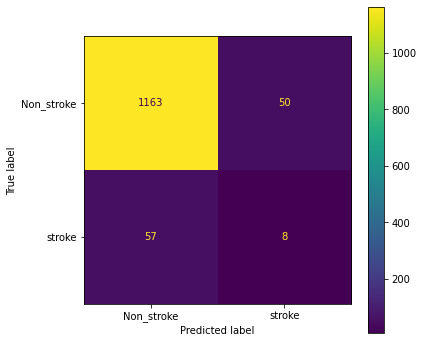

In [26]:

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test) 
y_pred = clf.predict(X_test)
print('recall: ', metrics.recall_score(y_test, y_pred))
print('precision ', metrics.precision_score(y_test, y_pred))
print('f1_score', metrics.f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
v_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non_stroke', 'stroke'])
v_cm.plot(values_format='d')

### LogisticRegression

recall:  0.7076923076923077
precision  0.13333333333333333
f1_score 0.22439024390243903


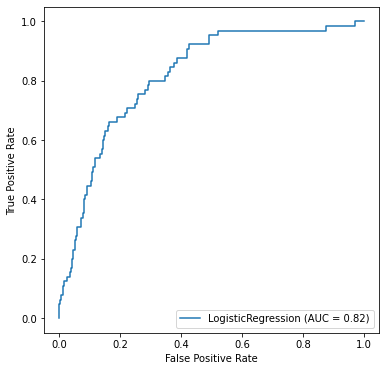

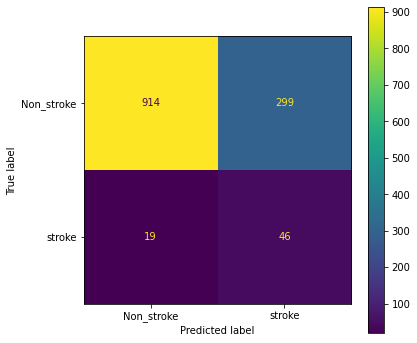

In [27]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('recall: ', metrics.recall_score(y_test, y_pred))
print('precision ', metrics.precision_score(y_test, y_pred))
print('f1_score', metrics.f1_score(y_test, y_pred))

metrics.plot_roc_curve(clf, X_test, y_test) 
cm = confusion_matrix(y_test, y_pred)
v_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non_stroke', 'stroke'])
v_cm.plot(values_format='d')

### SVM

### Using grid search to find the best parameters for SVM

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
# other kernel SVM
from sklearn import svm
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10]:
        for kernel in ['linear', 'rbf', 'sigmoid']:
            clf = svm.SVC(kernel=kernel, gamma=gamma, C=C, class_weight='balanced')
            # print(f'gamma: {gamma}, C: {C}, kernel: {kernel}')
            clf.fit(X_train, y_train)
            # evaluate the SVC on the test set
            score = f1_score(y_test, clf.predict(X_test), zero_division=0)
            # print('f1_score: ', score)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.24
Best parameters: {'C': 0.001, 'gamma': 0.1, 'kernel': 'sigmoid'}


recall:  0.7846153846153846
precision  0.13821138211382114
f1_score 0.2350230414746544


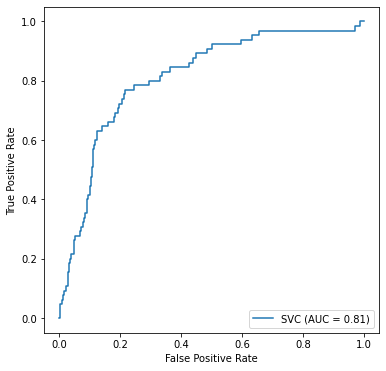

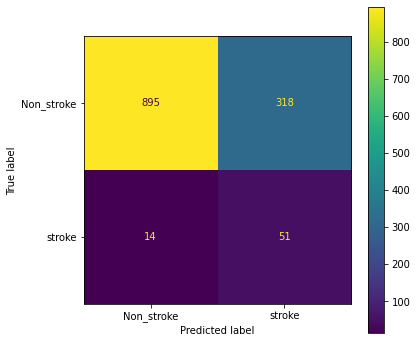

In [29]:
clf = svm.SVC(kernel=best_parameters['kernel'], gamma=best_parameters['gamma'], C=best_parameters['C'], class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('recall: ', metrics.recall_score(y_test, y_pred))
print('precision ', metrics.precision_score(y_test, y_pred))
print('f1_score', metrics.f1_score(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test) 
prediction = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

v_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non_stroke', 'stroke'])
v_cm.plot(values_format='d')

In [30]:
kernel = 'poly'
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1]:
    for C in [0.001, 0.01, 0.1, 1, 10]:
        for degree in [3, 4, 5]:
            clf = svm.SVC(kernel=kernel, gamma=gamma, C=C, class_weight='balanced', degree=degree)
            # print(f'gamma: {gamma}, C: {C}, kernel: {kernel}, degree: {degree}')
            clf.fit(X_train, y_train)
            # evaluate the SVC on the test set
            score = f1_score(y_test, clf.predict(X_test), zero_division=0)
            # print('f1_score: ', score)
        
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel, 'degree': degree}
                
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.26
Best parameters: {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly', 'degree': 4}


recall:  0.4461538461538462
precision  0.18471337579617833
f1_score 0.2612612612612612


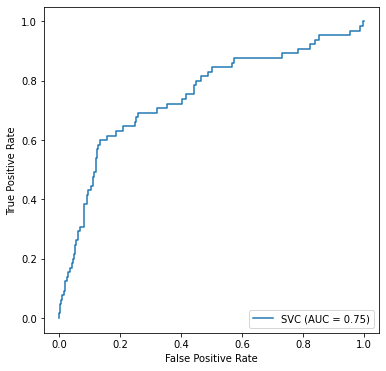

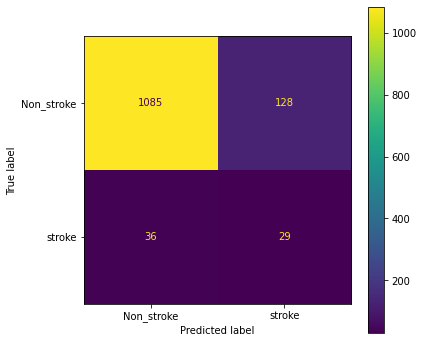

In [31]:
clf = svm.SVC(kernel=best_parameters['kernel'], gamma=best_parameters['gamma'], C=best_parameters['C'], class_weight='balanced', degree=best_parameters['degree'])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('recall: ', metrics.recall_score(y_test, y_pred))
print('precision ', metrics.precision_score(y_test, y_pred))
print('f1_score', metrics.f1_score(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test) 
prediction = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

v_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non_stroke', 'stroke'])
v_cm.plot(values_format='d')


* Using different kernels and parameters, SVM can achieve a best recall of 0.7846153846153846 and precision: 0.13821138211382114. (Best parameters: {'C': 0.001, 'gamma': 0.1, 'kernel': 'sigmoid'})

### An experiment with NN

* Because we have an unbalanced dataset, we use weighted loss to train the model.

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Sequential, Input
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras import backend as K

# class_weight based on count of pos and neg
counts = np.bincount(y_train)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
class_weight = {0: weight_for_0, 1: weight_for_1}

batch_size = 32
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(optimizer=keras.optimizers.Adam(1e-2), loss='binary_crossentropy', metrics=metrics)

# Train the model with class_weight argument
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test), 
          batch_size=batch_size, 
          epochs=100, 
          verbose=2, 
          class_weight=class_weight)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                288       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
____________________________________________________

Epoch 27/100
120/120 - 1s - loss: 2.2158e-04 - fn: 19.0000 - fp: 964.0000 - tn: 2684.0000 - tp: 165.0000 - precision: 0.1461 - recall: 0.8967 - val_loss: 0.5029 - val_fn: 23.0000 - val_fp: 326.0000 - val_tn: 887.0000 - val_tp: 42.0000 - val_precision: 0.1141 - val_recall: 0.6462
Epoch 28/100
120/120 - 1s - loss: 2.1963e-04 - fn: 25.0000 - fp: 914.0000 - tn: 2734.0000 - tp: 159.0000 - precision: 0.1482 - recall: 0.8641 - val_loss: 0.4754 - val_fn: 26.0000 - val_fp: 306.0000 - val_tn: 907.0000 - val_tp: 39.0000 - val_precision: 0.1130 - val_recall: 0.6000
Epoch 29/100
120/120 - 1s - loss: 2.1676e-04 - fn: 26.0000 - fp: 946.0000 - tn: 2702.0000 - tp: 158.0000 - precision: 0.1431 - recall: 0.8587 - val_loss: 0.4893 - val_fn: 24.0000 - val_fp: 317.0000 - val_tn: 896.0000 - val_tp: 41.0000 - val_precision: 0.1145 - val_recall: 0.6308
Epoch 30/100
120/120 - 1s - loss: 2.1580e-04 - fn: 22.0000 - fp: 923.0000 - tn: 2725.0000 - tp: 162.0000 - precision: 0.1493 - recall: 0.8804 - val_loss: 0.4838

Epoch 57/100
120/120 - 1s - loss: 2.0560e-04 - fn: 20.0000 - fp: 874.0000 - tn: 2774.0000 - tp: 164.0000 - precision: 0.1580 - recall: 0.8913 - val_loss: 0.4862 - val_fn: 23.0000 - val_fp: 300.0000 - val_tn: 913.0000 - val_tp: 42.0000 - val_precision: 0.1228 - val_recall: 0.6462
Epoch 58/100
120/120 - 1s - loss: 2.1050e-04 - fn: 20.0000 - fp: 853.0000 - tn: 2795.0000 - tp: 164.0000 - precision: 0.1613 - recall: 0.8913 - val_loss: 0.4763 - val_fn: 25.0000 - val_fp: 288.0000 - val_tn: 925.0000 - val_tp: 40.0000 - val_precision: 0.1220 - val_recall: 0.6154
Epoch 59/100
120/120 - 1s - loss: 2.0514e-04 - fn: 22.0000 - fp: 832.0000 - tn: 2816.0000 - tp: 162.0000 - precision: 0.1630 - recall: 0.8804 - val_loss: 0.4675 - val_fn: 27.0000 - val_fp: 280.0000 - val_tn: 933.0000 - val_tp: 38.0000 - val_precision: 0.1195 - val_recall: 0.5846
Epoch 60/100
120/120 - 1s - loss: 2.0844e-04 - fn: 23.0000 - fp: 833.0000 - tn: 2815.0000 - tp: 161.0000 - precision: 0.1620 - recall: 0.8750 - val_loss: 0.4929

Epoch 87/100
120/120 - 1s - loss: 1.9040e-04 - fn: 13.0000 - fp: 847.0000 - tn: 2801.0000 - tp: 171.0000 - precision: 0.1680 - recall: 0.9293 - val_loss: 0.4831 - val_fn: 29.0000 - val_fp: 269.0000 - val_tn: 944.0000 - val_tp: 36.0000 - val_precision: 0.1180 - val_recall: 0.5538
Epoch 88/100
120/120 - 1s - loss: 1.9949e-04 - fn: 23.0000 - fp: 767.0000 - tn: 2881.0000 - tp: 161.0000 - precision: 0.1735 - recall: 0.8750 - val_loss: 0.5262 - val_fn: 25.0000 - val_fp: 308.0000 - val_tn: 905.0000 - val_tp: 40.0000 - val_precision: 0.1149 - val_recall: 0.6154
Epoch 89/100
120/120 - 1s - loss: 1.9494e-04 - fn: 17.0000 - fp: 834.0000 - tn: 2814.0000 - tp: 167.0000 - precision: 0.1668 - recall: 0.9076 - val_loss: 0.4969 - val_fn: 27.0000 - val_fp: 282.0000 - val_tn: 931.0000 - val_tp: 38.0000 - val_precision: 0.1187 - val_recall: 0.5846
Epoch 90/100
120/120 - 1s - loss: 1.9249e-04 - fn: 14.0000 - fp: 801.0000 - tn: 2847.0000 - tp: 170.0000 - precision: 0.1751 - recall: 0.9239 - val_loss: 0.5014

recall:  0.5692307692307692
precision  0.12091503267973856
f1_score 0.1994609164420485


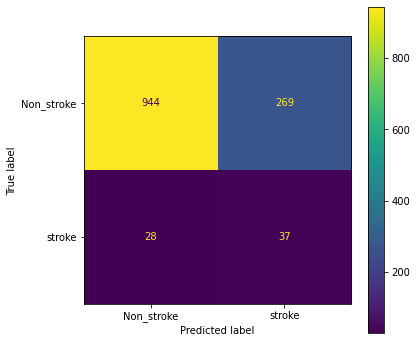

In [45]:
from sklearn import metrics
thres = 0.5
prediction = model.predict(X_test)
prediction[prediction > thres] = 1
prediction[prediction <= thres] = 0
cm = confusion_matrix(y_test, prediction)
v_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non_stroke', 'stroke'])
v_cm.plot(values_format='d')


print('recall: ', metrics.recall_score(y_test, prediction))
print('precision ', metrics.precision_score(y_test, prediction))
print('f1_score', metrics.f1_score(y_test, prediction))


In [46]:
y_train.shape

(3832,)

## Conclusion:
* Decision Tree Classifier: 
    * recall:  0.12307692307692308
    * precision  0.13793103448275862
    * f1_score 0.13008130081300814  
  
  
* Logistic Regression:
    * recall:  0.7076923076923077
    * precision  0.13333333333333333
    * f1_score 0.22439024390243903  
  
  
* SVM ('C': 0.001, 'gamma': 0.1, 'kernel': 'sigmoid'):
    * recall:  0.7846153846153846
    * precision  0.13821138211382114
    * f1_score 0.2350230414746544
  
  
* SVM ('C': 0.01, 'gamma': 0.1, 'kernel': 'poly', 'degree': 4):
    * recall:  0.4461538461538462
    * precision  0.18471337579617833
    * f1_score 0.2612612612612612  
  
  
* NN
    * recall:  0.5692307692307692
    * precision  0.12091503267973856
    * f1_score 0.1994609164420485
  
  
In our case, stroke is positive/ non_stroke is negative. If stroke is predicted to be non_stroke, it is FN(false negative), and if non_stroke is predicted to be stroke, it is FP(false positive). 
* Recall is TP/(TP+FN), which is the ability of the classifier to find all the positive samples; 
* Precision is TP/(TP+FP), which is the ability of the classifier not to label as positive a sample that is negative.
* F1 is 2 * (precision * recall) / (precision + recall), which is a weighted average of the precision and recall.

In our case, because we have an *__unbanlanced__*  dataset (more non_stroke than stroke), we can not use accuracy as the metric, instead we should focus on the recall and precision. The logistic regression and SVM models perform better than others.
  
And because we also have very limited training data (around 4000), we can not build very deep NN, which could be a possible reason limit the performance of the NN. With more data given, 
 